<a href="https://colab.research.google.com/github/baiju012/Comparative-Analysis-of-Sentiment-Classification-on-Indian-Languages-using-Deep-Learning/blob/main/lora_with_muril_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# prompt: how to load the downloaded csv dataset

df_train = pd.read_csv('MahaSent_All_Train.csv')
df_test = pd.read_csv('MahaSent_All_Test.csv')
df_val = pd.read_csv('MahaSent_All_Val.csv')  # Replace with your file path
print(df_train.head())
print(df_test.head())
print(df_val.head())
# 1. Find the unique labels in your training set:
unique_labels_train = df_train['label'].unique()
print(f"Unique labels in train set: {unique_labels_train}")

# 2. Find the unique labels in your validation set:
unique_labels_val = df_val['label'].unique()
print(f"Unique labels in validation set: {unique_labels_val}")

# 3. Find the unique labels in your test set:
unique_labels_test = df_test['label'].unique()
print(f"Unique labels in test set: {unique_labels_test}")

# 4. If -1 or any other unexpected label is present, you need to remap it to a valid range:
# Example: Remap -1 to 2 (assuming you have 3 sentiment classes: 0, 1, 2)
#dataset_train['label'] = dataset_train['label'].replace(-1, 1) #Replace -1 with the correct intended class
#df_train['label'] = df_train['label'].replace(-1,1)
#df_train['label'] = df_train['label'].replace(-1,1)
#df_train['label'] = df_train['label'].replace(-1,1)
# Assuming your labels are in a column called 'label' in your pandas DataFrames:

df_train['label'] = df_train['label'].replace([-1, 0, 1], [0, 1, 2])
df_val['label'] = df_val['label'].replace([-1, 0, 1], [0, 1, 2])
df_test['label'] = df_test['label'].replace([-1, 0, 1], [0, 1, 2])
#df_train['label'] = df_train['label'].replace(-1, 1)
#df_val['label'] = df_val['label'].replace(-1, 2)
#df_test['label'] = df_test['label'].replace(-1, 2)
print(df_train.head())
print(df_test.head())
print(df_val.head())


   Unnamed: 0                                               text  label
0           0          होता होता राहीलेला  निवडणूक मारो मर्ज़ीभई     -1
1           1                     खरा लखोबा तर हा बोबडाच आहे         -1
2           2  मुंबईतील घाटकोपरमध्ये धुळवड खेळून घरी परतलेलं ...     -1
3           3      वेडाबाई भूतकाळ बघ लोक शेन घालतात आणी दांडा ही     -1
4           4   कुर्ला वाहतुक विभागाला फक्त हे पाठवले जाते पण...     -1
   Unnamed: 0                                               text  label
0           0                                    कुलकर्णी हे बघ      -1
1           1   हे प्रत्येक पक्ष्याच्या सतरंज्या उचल्यागीरी क...     -1
2           2   जी च्या दृष्टीने पुणे जिल्ह्यात एकही लायक आमद...     -1
3           3   शेणकयांच वजन    किलो त्याच्यापेक्षा वजनदार भा...     -1
4           4   पार होती नव्हती इज्जत काढली....सरकारी लोक स्व...     -1
   Unnamed: 0                                               text  label
0           0   काय?? आव्हाड महाराष्ट्रियन ऑफ द ईयर , पुरस्का...

In [ ]:
df_train.shape

(48114, 3)

In [ ]:
df_test.shape

(6750, 3)

In [ ]:
df_val.shape
df_train.info()
df_train['label'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48114 entries, 0 to 48113
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48114 non-null  int64 
 1   text        48114 non-null  object
 2   label       48114 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


array([0, 1, 2])

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Separate features and labels
X_train, y_train = df_train['text'], df_train['label']
X_test, y_test = df_test['text'], df_test['label']
X_val, y_val = df_val['text'], df_val['label']

# Text vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# ---- Apply Logistic Regression ----
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_tfidf, y_train)

# Evaluate on test data
y_pred = log_reg.predict(X_test_tfidf)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))

# ---- Save the Logistic Regression model and vectorizer ----
import joblib
joblib.dump(log_reg, "logistic_regression_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

# ---- Uncomment below to try other algorithms ----

# # 1. Naive Bayes
# naive_bayes = MultinomialNB()
# naive_bayes.fit(X_train_tfidf, y_train)
# y_pred_nb = naive_bayes.predict(X_test_tfidf)
# print("Classification Report for Naive Bayes:")
# print(classification_report(y_test, y_pred_nb))

# # 2. Random Forest
# random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
# random_forest.fit(X_train_tfidf, y_train)
# y_pred_rf = random_forest.predict(X_test_tfidf)
# print("Classification Report for Random Forest:")
# print(classification_report(y_test, y_pred_rf))

# # 3. Support Vector Machine (SVM)
# svc = SVC(kernel='linear', random_state=42)
# svc.fit(X_train_tfidf, y_train)
# y_pred_svc = svc.predict(X_test_tfidf)
# print("Classification Report for SVM:")
# print(classification_report(y_test, y_pred_svc))

# # 4. K-Nearest Neighbors (KNN)
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train_tfidf, y_train)
# y_pred_knn = knn.predict(X_test_tfidf)
# print("Classification Report for KNN:")
# print(classification_report(y_test, y_pred_knn))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.60      0.62      0.61      2250
           1       0.54      0.57      0.56      2250
           2       0.66      0.61      0.64      2250

    accuracy                           0.60      6750
   macro avg       0.60      0.60      0.60      6750
weighted avg       0.60      0.60      0.60      6750



['tfidf_vectorizer.pkl']

In [ ]:
# 1. Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)
y_pred_nb = naive_bayes.predict(X_test_tfidf)
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           1       0.78      0.28      0.41      2250
           2       0.73      0.96      0.83      4500

    accuracy                           0.73      6750
   macro avg       0.75      0.62      0.62      6750
weighted avg       0.75      0.73      0.69      6750



In [ ]:
# 2. Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_tfidf, y_train)
y_pred_rf = random_forest.predict(X_test_tfidf)
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           1       0.72      0.39      0.50      2250
           2       0.75      0.92      0.83      4500

    accuracy                           0.75      6750
   macro avg       0.74      0.66      0.67      6750
weighted avg       0.74      0.75      0.72      6750



In [ ]:
# 3. Support Vector Machine (SVM)
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train_tfidf, y_train)
y_pred_svc = svc.predict(X_test_tfidf)
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svc))


Classification Report for SVM:
              precision    recall  f1-score   support

           1       0.73      0.41      0.52      2250
           2       0.76      0.92      0.83      4500

    accuracy                           0.75      6750
   macro avg       0.74      0.67      0.68      6750
weighted avg       0.75      0.75      0.73      6750



In [ ]:
# 4. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train)
y_pred_knn = knn.predict(X_test_tfidf)
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

Classification Report for KNN:
              precision    recall  f1-score   support

           1       0.54      0.23      0.32      2250
           2       0.70      0.90      0.79      4500

    accuracy                           0.68      6750
   macro avg       0.62      0.57      0.56      6750
weighted avg       0.65      0.68      0.63      6750



In [ ]:
!pip install transformers datasets peft accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/3.16M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/953M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/muril-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/48114 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/953M [00:00<?, ?B/s]

Map:   0%|          | 0/6750 [00:00<?, ? examples/s]

Map:   0%|          | 0/6000 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-9-be485365ddca>:86: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.956000,0.934665,0.615833,0.539249,0.605260,0.615833
2,0.885400,0.853133,0.683333,0.658768,0.684256,0.683333
3,0.857300,0.829642,0.702500,0.684240,0.703519,0.702500


Validation Results: {'eval_loss': 0.8296418190002441, 'eval_accuracy': 0.7025, 'eval_f1': 0.684240373422978, 'eval_precision': 0.7035192456505659, 'eval_recall': 0.7025, 'eval_runtime': 24.0418, 'eval_samples_per_second': 249.565, 'eval_steps_per_second': 31.196, 'epoch': 3.0}


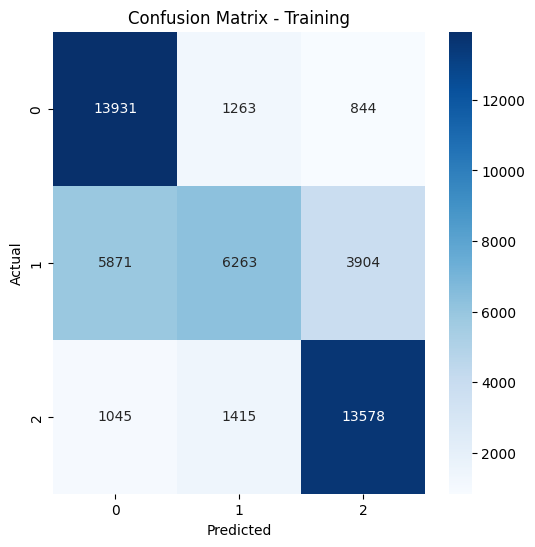

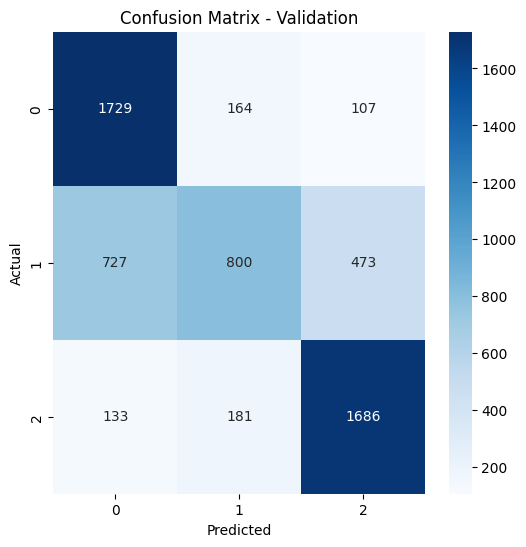

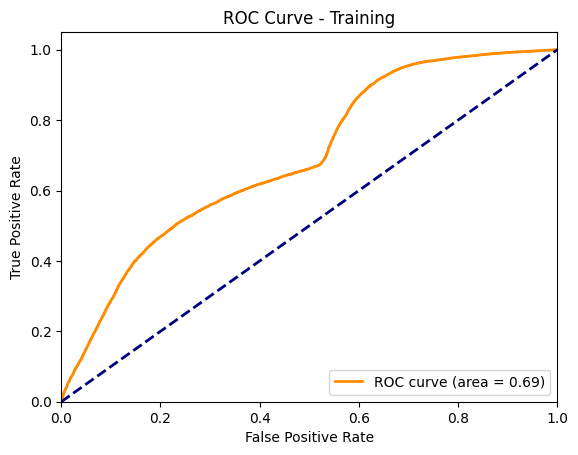

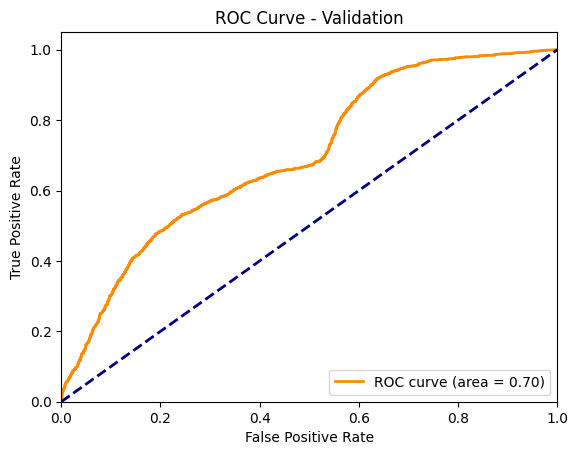

('./lora_finetuned_model/tokenizer_config.json',
 './lora_finetuned_model/special_tokens_map.json',
 './lora_finetuned_model/vocab.txt',
 './lora_finetuned_model/added_tokens.json',
 './lora_finetuned_model/tokenizer.json')

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer
from datasets import Dataset, DatasetDict
from peft import get_peft_model, LoraConfig, TaskType
import torch
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Model selection
model_name = "google/muril-base-cased"  # Example with MuRIL

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)  # Adjust num_labels for sentiment classes

# Load dataset (replace `df_train`, `df_test`, `df_val` with actual dataset variables)
dataset_train = Dataset.from_pandas(df_train)
dataset_test = Dataset.from_pandas(df_test)
dataset_val = Dataset.from_pandas(df_val)

# Drop unnecessary columns
dataset_train = dataset_train.remove_columns("Unnamed: 0")
dataset_test = dataset_test.remove_columns("Unnamed: 0")
dataset_val = dataset_val.remove_columns("Unnamed: 0")

# Tokenize the dataset
def preprocess_function(examples):
    return tokenizer(examples['text'], truncation=True, padding=True, max_length=128)

dataset_train = dataset_train.map(preprocess_function, batched=True)
dataset_test = dataset_test.map(preprocess_function, batched=True)
dataset_val = dataset_val.map(preprocess_function, batched=True)

# Create a DatasetDict with train, test, and validation sets
tokenized_datasets = DatasetDict({
    'train': dataset_train,
    'test': dataset_test,
    'validation': dataset_val
})

# LoRA configuration for low-rank fine-tuning
lora_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,   # Sequence classification task
    inference_mode=False,
    r=8,
    lora_alpha=16,
    lora_dropout=0.1
)
model = get_peft_model(model, lora_config)

# Custom compute_metrics function for Trainer
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)

    # Calculate metrics
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    precision = precision_score(labels, preds, average='weighted')
    recall = recall_score(labels, preds, average='weighted')

    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=2,
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=50,
)

# Define Trainer with custom metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Train the model
train_output = trainer.train()

# Evaluate the model on the validation set
eval_results = trainer.evaluate()
print(f"Validation Results: {eval_results}")

# Plotting functions
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_roc_curve(y_true, y_pred_probs, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_pred_probs, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Get model predictions on train and validation sets
train_preds = trainer.predict(tokenized_datasets["train"])
val_preds = trainer.predict(tokenized_datasets["validation"])

y_train = tokenized_datasets["train"]["label"]
y_val = tokenized_datasets["validation"]["label"]

y_train_pred = np.argmax(train_preds.predictions, axis=-1)
y_val_pred = np.argmax(val_preds.predictions, axis=-1)

# Plot confusion matrices
plot_confusion_matrix(y_train, y_train_pred, title="Confusion Matrix - Training")
plot_confusion_matrix(y_val, y_val_pred, title="Confusion Matrix - Validation")

# Plot ROC curves (binary classifiers use pos_label=1; for multiclass, use individual classes or other adjustments)
plot_roc_curve(y_train, train_preds.predictions[:, 1], title="ROC Curve - Training")
plot_roc_curve(y_val, val_preds.predictions[:, 1], title="ROC Curve - Validation")

# # Plot loss graph for training and validation
# epochs = range(1, training_args.num_train_epochs + 1)
# training_loss = [log['loss'] for log in trainer.state.log_history if 'loss' in log]
# validation_loss = [log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log]

# plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
# plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
# plt.legend()
# plt.show()

# Save the final model and tokenizer
model.save_pretrained("./lora_finetuned_model")
tokenizer.save_pretrained("./lora_finetuned_model")


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/48114 [00:00<?, ? examples/s]

Map:   0%|          | 0/6750 [00:00<?, ? examples/s]

Map:   0%|          | 0/6000 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.906300,0.871660,0.593167,0.588081,0.591601,0.593167
2,0.912100,0.828702,0.623500,0.621117,0.623976,0.623500
3,0.836100,0.820356,0.625333,0.623470,0.623817,0.625333


Validation Results: {'eval_loss': 0.8203556537628174, 'eval_accuracy': 0.6253333333333333, 'eval_f1': 0.6234700206272163, 'eval_precision': 0.6238165526863156, 'eval_recall': 0.6253333333333333, 'eval_runtime': 22.6004, 'eval_samples_per_second': 265.482, 'eval_steps_per_second': 33.185, 'epoch': 3.0}


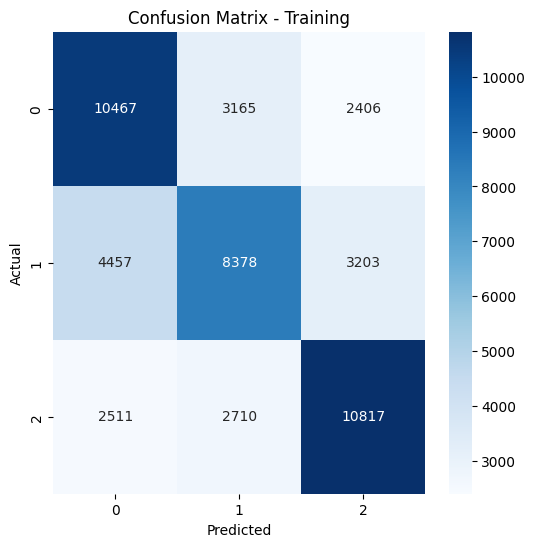

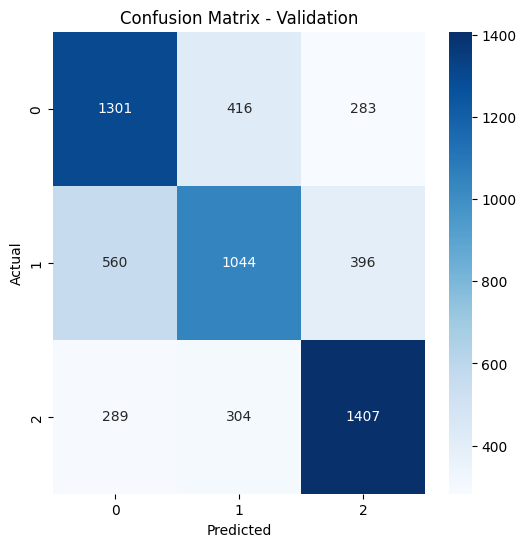

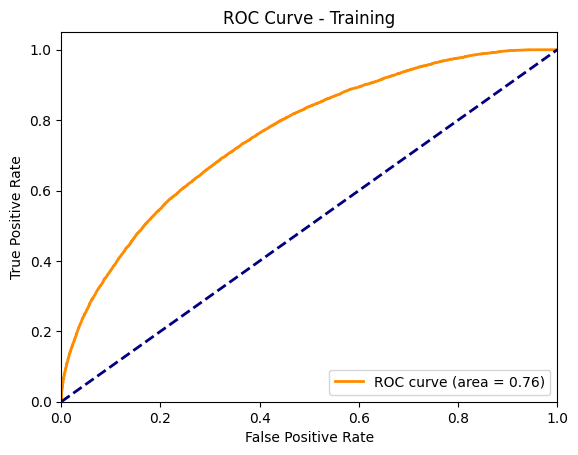

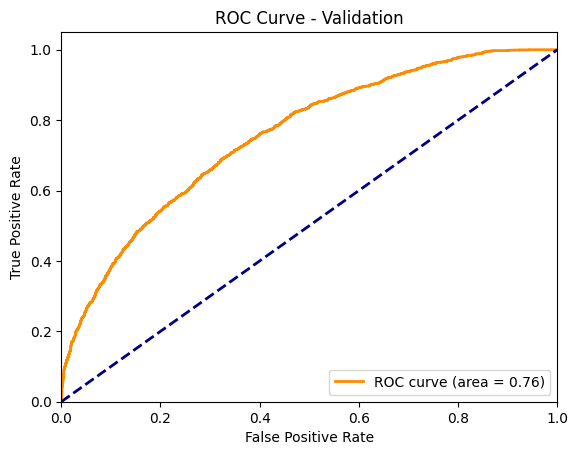

('./lora_finetuned_model/tokenizer_config.json',
 './lora_finetuned_model/special_tokens_map.json',
 './lora_finetuned_model/vocab.txt',
 './lora_finetuned_model/added_tokens.json',
 './lora_finetuned_model/tokenizer.json')

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer
from datasets import Dataset, DatasetDict
from peft import get_peft_model, LoraConfig, TaskType
import torch
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Model selection
model_name = "distilbert-base-multilingual-cased"  # Example with MuRIL

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)  # Adjust num_labels for sentiment classes

# Load dataset (replace `df_train`, `df_test`, `df_val` with actual dataset variables)
dataset_train = Dataset.from_pandas(df_train)
dataset_test = Dataset.from_pandas(df_test)
dataset_val = Dataset.from_pandas(df_val)

# Drop unnecessary columns
dataset_train = dataset_train.remove_columns("Unnamed: 0")
dataset_test = dataset_test.remove_columns("Unnamed: 0")
dataset_val = dataset_val.remove_columns("Unnamed: 0")

# Tokenize the dataset
def preprocess_function(examples):
    return tokenizer(examples['text'], truncation=True, padding=True, max_length=128)

dataset_train = dataset_train.map(preprocess_function, batched=True)
dataset_test = dataset_test.map(preprocess_function, batched=True)
dataset_val = dataset_val.map(preprocess_function, batched=True)

# Create a DatasetDict with train, test, and validation sets
tokenized_datasets = DatasetDict({
    'train': dataset_train,
    'test': dataset_test,
    'validation': dataset_val
})


# # LoRA configuration for low-rank fine-tuning
# lora_config = LoraConfig(
#     task_type=TaskType.SEQ_CLS,   # Sequence classification task
#     inference_mode=False,
#     r=8,
#     lora_alpha=16,
#     lora_dropout=0.1
# )
# model = get_peft_model(model, lora_config)

# Adjusted LoRA configuration for DistilBERT with correct target modules
lora_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,   # Sequence classification task
    inference_mode=False,
    r=4,                          # LoRA rank
    lora_alpha=8,                 # Alpha scaling factor
    lora_dropout=0.1,             # Dropout rate to avoid overfitting
    target_modules=["q_lin", "k_lin", "v_lin", "out_lin"]  # DistilBERT attention layer parts
)

# Apply LoRA configuration to the DistilBERT model
model = get_peft_model(model, lora_config)

# Custom compute_metrics function for Trainer
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)

    # Calculate metrics
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    precision = precision_score(labels, preds, average='weighted')
    recall = recall_score(labels, preds, average='weighted')

    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=2,
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=50,
)

# Define Trainer with custom metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Train the model
train_output = trainer.train()

# Evaluate the model on the validation set
eval_results = trainer.evaluate()
print(f"Validation Results: {eval_results}")

# Plotting functions
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_roc_curve(y_true, y_pred_probs, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_pred_probs, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Get model predictions on train and validation sets
train_preds = trainer.predict(tokenized_datasets["train"])
val_preds = trainer.predict(tokenized_datasets["validation"])

y_train = tokenized_datasets["train"]["label"]
y_val = tokenized_datasets["validation"]["label"]

y_train_pred = np.argmax(train_preds.predictions, axis=-1)
y_val_pred = np.argmax(val_preds.predictions, axis=-1)

# Plot confusion matrices
plot_confusion_matrix(y_train, y_train_pred, title="Confusion Matrix - Training")
plot_confusion_matrix(y_val, y_val_pred, title="Confusion Matrix - Validation")

# Plot ROC curves (binary classifiers use pos_label=1; for multiclass, use individual classes or other adjustments)
plot_roc_curve(y_train, train_preds.predictions[:, 1], title="ROC Curve - Training")
plot_roc_curve(y_val, val_preds.predictions[:, 1], title="ROC Curve - Validation")

# # Plot loss graph for training and validation
# epochs = range(1, training_args.num_train_epochs + 1)
# training_loss = [log['loss'] for log in trainer.state.log_history if 'loss' in log]
# validation_loss = [log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log]

# plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
# plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
# plt.legend()
# plt.show()

# Save the final model and tokenizer
model.save_pretrained("./lora_finetuned_model")
tokenizer.save_pretrained("./lora_finetuned_model")


In [ ]:

from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer
from datasets import Dataset, DatasetDict
from peft import get_peft_model, LoraConfig, TaskType
import torch
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Model selection
model_name = "ai4bharat/indic-bert"  # Example with MuRIL

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)  # Adjust num_labels for sentiment classes

# Load dataset (replace `df_train`, `df_test`, `df_val` with actual dataset variables)
dataset_train = Dataset.from_pandas(df_train)
dataset_test = Dataset.from_pandas(df_test)
dataset_val = Dataset.from_pandas(df_val)

# Drop unnecessary columns
dataset_train = dataset_train.remove_columns("Unnamed: 0")
dataset_test = dataset_test.remove_columns("Unnamed: 0")
dataset_val = dataset_val.remove_columns("Unnamed: 0")

# Tokenize the dataset
def preprocess_function(examples):
    return tokenizer(examples['text'], truncation=True, padding=True, max_length=128)

dataset_train = dataset_train.map(preprocess_function, batched=True)
dataset_test = dataset_test.map(preprocess_function, batched=True)
dataset_val = dataset_val.map(preprocess_function, batched=True)

# Create a DatasetDict with train, test, and validation sets
tokenized_datasets = DatasetDict({
    'train': dataset_train,
    'test': dataset_test,
    'validation': dataset_val
})

from peft import LoraConfig, TaskType

# LoRA configuration for IndicBERT model
lora_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,       # Task type: sequence classification
    inference_mode=False,             # Training mode
    r=8,                              # LoRA rank (low-rank matrix dimension)
    lora_alpha=16,                    # Scaling factor
    lora_dropout=0.1,                 # Dropout to avoid overfitting

    # Specify target modules based on common IndicBERT structure
    target_modules=[
        "attention.self_attn.query",
        "attention.self_attn.key",
        "attention.self_attn.value",
        "output.dense"
    ]
)


# Custom compute_metrics function for Trainer
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)

    # Calculate metrics
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    precision = precision_score(labels, preds, average='weighted')
    recall = recall_score(labels, preds, average='weighted')

    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=2,
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=50,
)

# Define Trainer with custom metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Train the model
train_output = trainer.train()

# Evaluate the model on the validation set
eval_results = trainer.evaluate()
print(f"Validation Results: {eval_results}")

# Plotting functions
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_roc_curve(y_true, y_pred_probs, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_pred_probs, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Get model predictions on train and validation sets
train_preds = trainer.predict(tokenized_datasets["train"])
val_preds = trainer.predict(tokenized_datasets["validation"])

y_train = tokenized_datasets["train"]["label"]
y_val = tokenized_datasets["validation"]["label"]

y_train_pred = np.argmax(train_preds.predictions, axis=-1)
y_val_pred = np.argmax(val_preds.predictions, axis=-1)

# Plot confusion matrices
plot_confusion_matrix(y_train, y_train_pred, title="Confusion Matrix - Training")
plot_confusion_matrix(y_val, y_val_pred, title="Confusion Matrix - Validation")

# Plot ROC curves (binary classifiers use pos_label=1; for multiclass, use individual classes or other adjustments)
plot_roc_curve(y_train, train_preds.predictions[:, 1], title="ROC Curve - Training")
plot_roc_curve(y_val, val_preds.predictions[:, 1], title="ROC Curve - Validation")


# Save the final model and tokenizer
model.save_pretrained("./lora_finetuned_model")
tokenizer.save_pretrained("./lora_finetuned_model")


ModuleNotFoundError: No module named 'datasets'